In [1]:
import pandas as pd
import numpy as np

In [6]:
import pandas as pd
import os

# Load the data files
file_v1 = "report_product_pages_v1.csv"
file_v2 = "report_product_pages_v2.csv"

# Read the CSV files into dataframes
data_v1 = pd.read_csv(file_v1)
data_v2 = pd.read_csv(file_v2)

# Drop the 'url' column
data_v1 = data_v1.drop(columns=['url'], errors='ignore')
data_v2 = data_v2.drop(columns=['url'], errors='ignore')

# Define output folder for the first analysis
output_folder = "first_analysis"
os.makedirs(output_folder, exist_ok=True)



In [7]:
data_v1

,company_name,filename,product
0,generali,service-kontakt_schaden-melden_hausrat.html,no
1,generali,privatkunden_gesundheit-freizeit_krankenhausta...,yes
2,generali,privatkunden_recht-haftung_tierhalterhaftpflic...,yes
3,generali,privatkunden_fahrzeug-zuhause_hausratversicher...,yes
4,generali,geschaeftskunden_gesundheit-betriebliche-vorso...,yes
...,...,...,...
1583,signal_iduna_group,produkte_ambulante-zusatzversicherung_angebot....,yes
1584,signal_iduna_group,produkte_auslandskrankenversicherung.html,yes
1585,signal_iduna_group,ratgeber_private-krankenversicherung-vorerkran...,no
1586,signal_iduna_group,produkte_reisegepaeckversicherung.html,yes


In [8]:
data_v2

,company_name,filename,product
0,generali,service-kontakt_schaden-melden_hausrat.html,no
1,generali,privatkunden_gesundheit-freizeit_krankenhausta...,yes
2,generali,privatkunden_recht-haftung_tierhalterhaftpflic...,yes
3,generali,privatkunden_fahrzeug-zuhause_hausratversicher...,yes
4,generali,geschaeftskunden_gesundheit-betriebliche-vorso...,yes
...,...,...,...
1583,signal_iduna_group,produkte_ambulante-zusatzversicherung_angebot....,yes
1584,signal_iduna_group,produkte_auslandskrankenversicherung.html,yes
1585,signal_iduna_group,ratgeber_private-krankenversicherung-vorerkran...,no
1586,signal_iduna_group,produkte_reisegepaeckversicherung.html,yes


In [9]:
# Function to calculate percentages and save results to a CSV file
def calculate_and_save_percentages(data, output_file):
    # Calculate percentage for each company
    company_percentages = (
        data.groupby(['company_name', 'product'])
        .size()
        .reset_index(name='count')  # Reset index to avoid conflicts
        .pivot(index='company_name', columns='product', values='count')
        .fillna(0)
    )

    # Calculate percentages
    company_percentages['yes_percentage'] = (company_percentages.get('yes', 0) / 
                                             company_percentages.sum(axis=1)) * 100
    company_percentages['no_percentage'] = (company_percentages.get('no', 0) / 
                                            company_percentages.sum(axis=1)) * 100

    company_percentages = company_percentages[['yes_percentage', 'no_percentage']].reset_index()

    # Calculate overall percentages
    overall_counts = data['product'].value_counts(normalize=True) * 100
    overall_percentages = pd.DataFrame({
        'company_name': ['Overall'],
        'yes_percentage': [overall_counts.get('yes', 0)],
        'no_percentage': [overall_counts.get('no', 0)]
    })

    # Combine company-specific and overall percentages
    result = pd.concat([company_percentages, overall_percentages], ignore_index=True)

    # Save the result to a CSV file
    result.to_csv(output_file, index=False)

# Process both datasets and save to the output folder
calculate_and_save_percentages(data_v1, os.path.join(output_folder, "analysis_v1.csv"))
calculate_and_save_percentages(data_v2, os.path.join(output_folder, "analysis_v2.csv"))

print(f"Analysis completed and saved in the folder: {output_folder}")

Analysis completed and saved in the folder: first_analysis


In [14]:
import pandas as pd
import os

# Load the dataset (replace with your file path)
file_v1 = "report_product_pages_v1.csv"
data_v1 = pd.read_csv(file_v1)

# Function to save unique rows for manual annotation as CSV and JSON, excluding the 'url' column
def prepare_annotation_data(data, output_file_csv, output_file_json):
    # Drop duplicate rows based on 'company_name' and 'filename'
    unique_data = data.drop_duplicates(subset=['company_name', 'filename'])
    
    # Drop the 'url' column if it exists
    unique_data = unique_data.drop(columns=['url'], errors='ignore')
    
    # Add an empty 'product' column for manual annotation
    unique_data['product'] = ""
    
    # Save to CSV file
    unique_data.to_csv(output_file_csv, index=False)
    
    # Save to JSON file
    unique_data.to_json(output_file_json, orient="records", lines=True)

# Define output files for annotation data
output_annotation_csv = "annotation_data/full_annotation_data.csv"
output_annotation_json = "annotation_data/full_annotation_data.json"
os.makedirs("annotation_data", exist_ok=True)

# Prepare the annotation data in both CSV and JSON formats
prepare_annotation_data(data_v1, output_annotation_csv, output_annotation_json)

print(f"Full annotation data (without 'url') created and saved as:\nCSV: {output_annotation_csv}\nJSON: {output_annotation_json}")


Full annotation data (without 'url') created and saved as:
CSV: annotation_data/full_annotation_data.csv
JSON: annotation_data/full_annotation_data.json


In [18]:
import json
# Path to your JSON Lines file
json_file = "binary_golden_data.json"

# Prepare a list to store valid JSON objects
valid_data = []

# Open the JSON Lines file and process line by line
with open(json_file, "r") as file:
    for line in file:
        try:
            # Attempt to parse the line as JSON
            json_obj = json.loads(line)
            valid_data.append(json_obj)
        except json.JSONDecodeError:
            # Skip invalid lines
            print(f"Invalid line skipped: {line.strip()}")

# Convert the valid JSON objects to a DataFrame
data = pd.DataFrame(valid_data)

# Define the output CSV file path
csv_file = "binary_golden_data.csv"

# Save the DataFrame to a CSV file
data.to_csv(csv_file, index=False)

print(f"JSON data converted and saved as CSV: {csv_file}")

Invalid line skipped: {{"company_name":"barmenia","filename":"deu_bde_privat_bde_service_bde_infocenter_bde_krankenversicherung_bde_erstattungsfaehige_naturheilverfahren_uebersicht.xhtml.html","product":"yes"}
Invalid line skipped: 
Invalid line skipped: 
JSON data converted and saved as CSV: binary_golden_data.csv


In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the datasets
ground_truth_file = "binary_golden_data.csv"
predicted_file_v1 = "report_product_pages_v1.csv"
predicted_file_v2 = "report_product_pages_v2.csv"

# Load ground truth and predicted data
ground_truth = pd.read_csv(ground_truth_file)
predicted_v1 = pd.read_csv(predicted_file_v1)
predicted_v2 = pd.read_csv(predicted_file_v2)

# Merge ground truth with predictions for evaluation
def merge_and_evaluate(ground_truth, predicted, dataset_name):
    # Merge on company_name and filename for unique matching
    merged_data = pd.merge(ground_truth, predicted, on=["company_name", "filename"], suffixes=("_true", "_pred"))
    
    # Ensure the product column exists in both datasets
    y_true = merged_data["product_true"]
    y_pred = merged_data["product_pred"]
    
    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred, labels=["yes", "no"])
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label="yes")
    recall = recall_score(y_true, y_pred, pos_label="yes")
    f1 = f1_score(y_true, y_pred, pos_label="yes")
    
    # Print metrics
    print(f"Evaluation Metrics for {dataset_name}:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")
    
    return cm, accuracy, precision, recall, f1

# Evaluate for both datasets
cm_v1, acc_v1, prec_v1, rec_v1, f1_v1 = merge_and_evaluate(ground_truth, predicted_v1, "report_product_pages_v1")
cm_v2, acc_v2, prec_v2, rec_v2, f1_v2 = merge_and_evaluate(ground_truth, predicted_v2, "report_product_pages_v2")


Evaluation Metrics for report_product_pages_v1:
Confusion Matrix:
[[740  63]
 [ 92 686]]
Accuracy: 0.90
Precision: 0.89
Recall: 0.92
F1 Score: 0.91


Evaluation Metrics for report_product_pages_v2:
Confusion Matrix:
[[777  26]
 [218 560]]
Accuracy: 0.85
Precision: 0.78
Recall: 0.97
F1 Score: 0.86




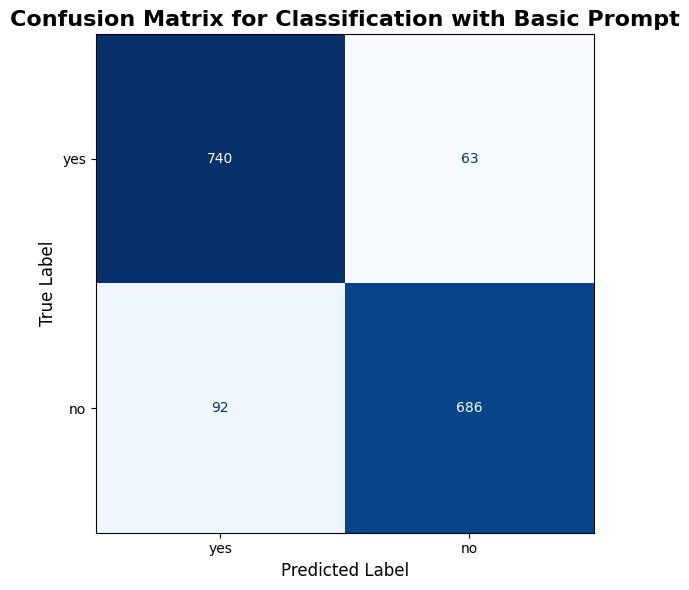

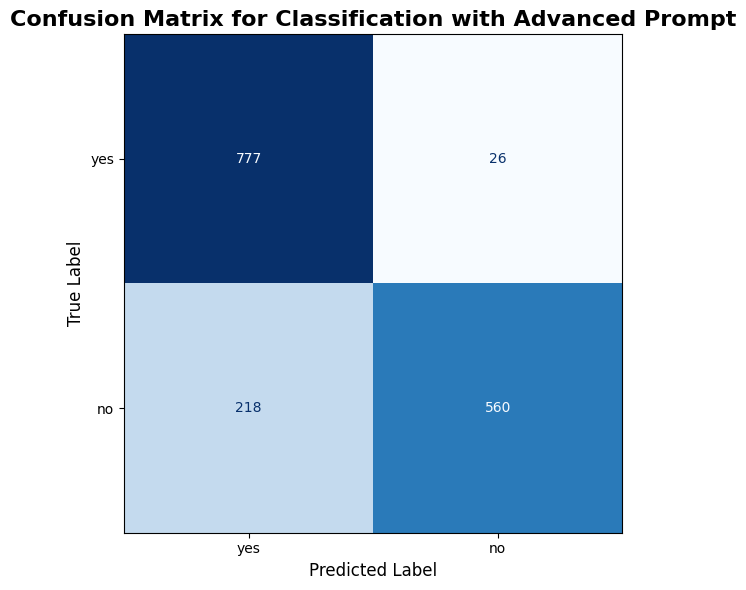

Evaluation Results:
                               Dataset  Accuracy  Precision    Recall  \
0     Classification with Basic Prompt  0.901961   0.889423  0.921544   
1  Classification with Advanced Prompt  0.845667   0.780905  0.967621   

   F1 Score  
0  0.905199  
1  0.864294  


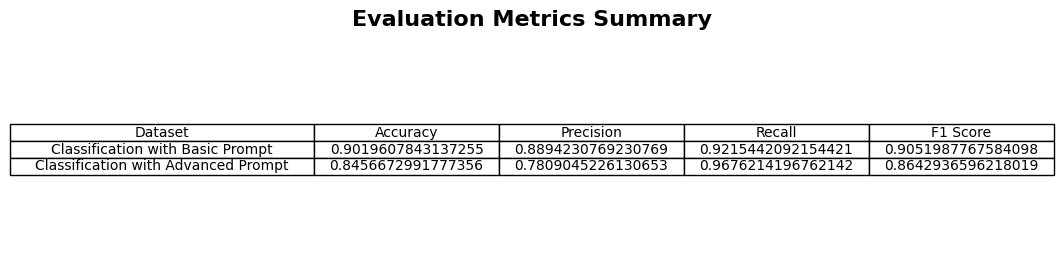

In [26]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the datasets
ground_truth_file = "binary_golden_data.csv"
predicted_file_v1 = "report_product_pages_v1.csv"
predicted_file_v2 = "report_product_pages_v2.csv"

# Load ground truth and predicted data
ground_truth = pd.read_csv(ground_truth_file)
predicted_v1 = pd.read_csv(predicted_file_v1)
predicted_v2 = pd.read_csv(predicted_file_v2)

# Define a function to style and plot the confusion matrix
def plot_confusion_matrix(cm, dataset_name):
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes", "no"])
    disp.plot(cmap=plt.cm.Blues, colorbar=False, ax=plt.gca())
    plt.title(f"Confusion Matrix for {dataset_name}", fontsize=16, fontweight="bold")
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Merge ground truth with predictions and evaluate
def merge_and_evaluate(ground_truth, predicted, dataset_name):
    # Merge on company_name and filename for unique matching
    merged_data = pd.merge(ground_truth, predicted, on=["company_name", "filename"], suffixes=("_true", "_pred"))
    
    # Extract labels
    y_true = merged_data["product_true"]
    y_pred = merged_data["product_pred"]
    
    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred, labels=["yes", "no"])
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label="yes")
    recall = recall_score(y_true, y_pred, pos_label="yes")
    f1 = f1_score(y_true, y_pred, pos_label="yes")
    
    # Print and plot results
    plot_confusion_matrix(cm, dataset_name)
    return {"Dataset": dataset_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Evaluate both datasets
results = []
results.append(merge_and_evaluate(ground_truth, predicted_v1, "Classification with Basic Prompt"))
results.append(merge_and_evaluate(ground_truth, predicted_v2, "Classification with Advanced Prompt"))

# Create a results table
results_df = pd.DataFrame(results)

# Display the results table
print("Evaluation Results:")
print(results_df)

# Plot the results table in a styled format
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc="center", cellLoc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

plt.title("Evaluation Metrics Summary", fontsize=16, fontweight="bold")
plt.show()


In [23]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 7.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.9 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.
